# DATA KLASIFIKASI YANG DIGUNAKAN

Data diperoleh dari Kaggle, berikut link file datanya:
https://www.kaggle.com/datasets/mexwell/blood-transfusion-classification

# PREPROCESSING

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [109]:
#pemanggilan data
data = pd.read_csv("blood_transfusion.csv")

In [ ]:
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [110]:
data.tail(5)

,Recency,Frequency,Monetary,Time,Class
743,23,2,500,38,not donated
744,21,2,500,52,not donated
745,23,3,750,62,not donated
746,39,1,250,39,not donated
747,72,1,250,72,not donated


In [111]:
#melihat statistika deskriptif
data.describe()

,Recency,Frequency,Monetary,Time
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    int64 
 1   Frequency  748 non-null    int64 
 2   Monetary   748 non-null    int64 
 3   Time       748 non-null    int64 
 4   Class      748 non-null    object
dtypes: int64(4), object(1)
memory usage: 29.3+ KB


In [113]:
data.isnull()

,Recency,Frequency,Monetary,Time,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


In [114]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


In [115]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(0)

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Recency','Frequency','Monetary','Time']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Recency: 7 outliers
Frequency: 45 outliers
Monetary: 45 outliers
Time: 0 outliers


In [117]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

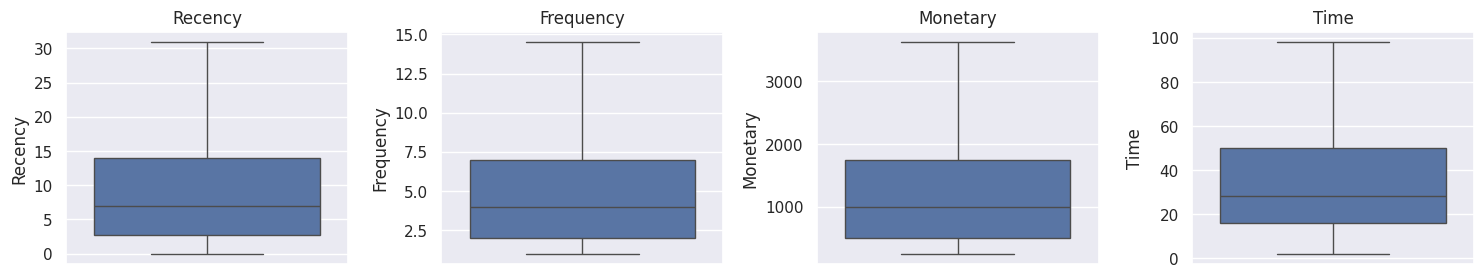

In [118]:
#cek boxplot lagi

num_cols = ['Recency','Frequency','Monetary','Time']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Recency','Frequency','Monetary','Time']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Recency: 0 outliers
Frequency: 0 outliers
Monetary: 0 outliers
Time: 0 outliers


In [120]:
#melihat isi dalam kolom
data['Recency'].unique()

array([ 2.   ,  0.   ,  1.   ,  4.   ,  5.   ,  9.   ,  3.   , 12.   ,
        6.   , 11.   , 10.   , 13.   ,  8.   , 14.   ,  7.   , 16.   ,
       15.   , 23.   , 21.   , 18.   , 22.   , 26.   , 30.875, 20.   ,
       17.   , 25.   ])

In [121]:
data['Frequency'].unique()

array([14.5, 13. ,  4. ,  7. , 12. ,  9. ,  3. , 10. ,  6. ,  5. , 14. ,
       11. ,  8. ,  2. ,  1. ])

In [122]:
data['Class'].unique()

array(['donated', 'not donated'], dtype=object)

In [123]:
from sklearn.preprocessing import LabelEncoder

# Menentukan urutan kategori yang benar
order = ['donated', 'not donated']

# Konversi ke tipe kategori dengan urutan yang ditentukan
data['Class'] = pd.Categorical(data['Class'], categories=order, ordered=True)

# Label Encoding
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

# Cek hasil mapping kategori ke angka
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'donated': np.int64(0), 'not donated': np.int64(1)}


In [124]:
print(data['Class'].head())

0    0
1    0
2    0
3    0
4    1
Name: Class, dtype: int64


In [125]:
data['Class'].unique()

array([0, 1])

In [126]:
encode_df = pd.DataFrame(data)
encode_df.to_csv('encoded_data.csv', index=False)
print("Data encoded:")
print(encode_df)

Data encoded:
     Recency  Frequency  Monetary  Time  Class
0      2.000       14.5    3625.0  98.0      0
1      0.000       13.0    3250.0  28.0      0
2      1.000       14.5    3625.0  35.0      0
3      2.000       14.5    3625.0  45.0      0
4      1.000       14.5    3625.0  77.0      1
..       ...        ...       ...   ...    ...
743   23.000        2.0     500.0  38.0      1
744   21.000        2.0     500.0  52.0      1
745   23.000        3.0     750.0  62.0      1
746   30.875        1.0     250.0  39.0      1
747   30.875        1.0     250.0  72.0      1

[748 rows x 5 columns]


In [127]:
from google.colab import files
files.download('encoded_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
data_encoded = pd.read_csv("encoded_data.csv")

In [130]:
data_encoded.head()

,Recency,Frequency,Monetary,Time,Class
0,2.0,14.5,3625.0,98.0,0
1,0.0,13.0,3250.0,28.0,0
2,1.0,14.5,3625.0,35.0,0
3,2.0,14.5,3625.0,45.0,0
4,1.0,14.5,3625.0,77.0,1


In [131]:
count_values = data['Class'].value_counts()
count_values

,count
Class,
1,570
0,178


In [132]:
# Menghitung rata-rata berdasarkan nilai 'Class'
mean_by_Class = data.groupby('Class').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Class'
print(mean_by_Class)

         Recency  Frequency     Monetary       Time
Class                                              
0       5.455056   6.567416  1641.853933  32.719101
1      10.561623   4.579825  1144.956140  34.770175


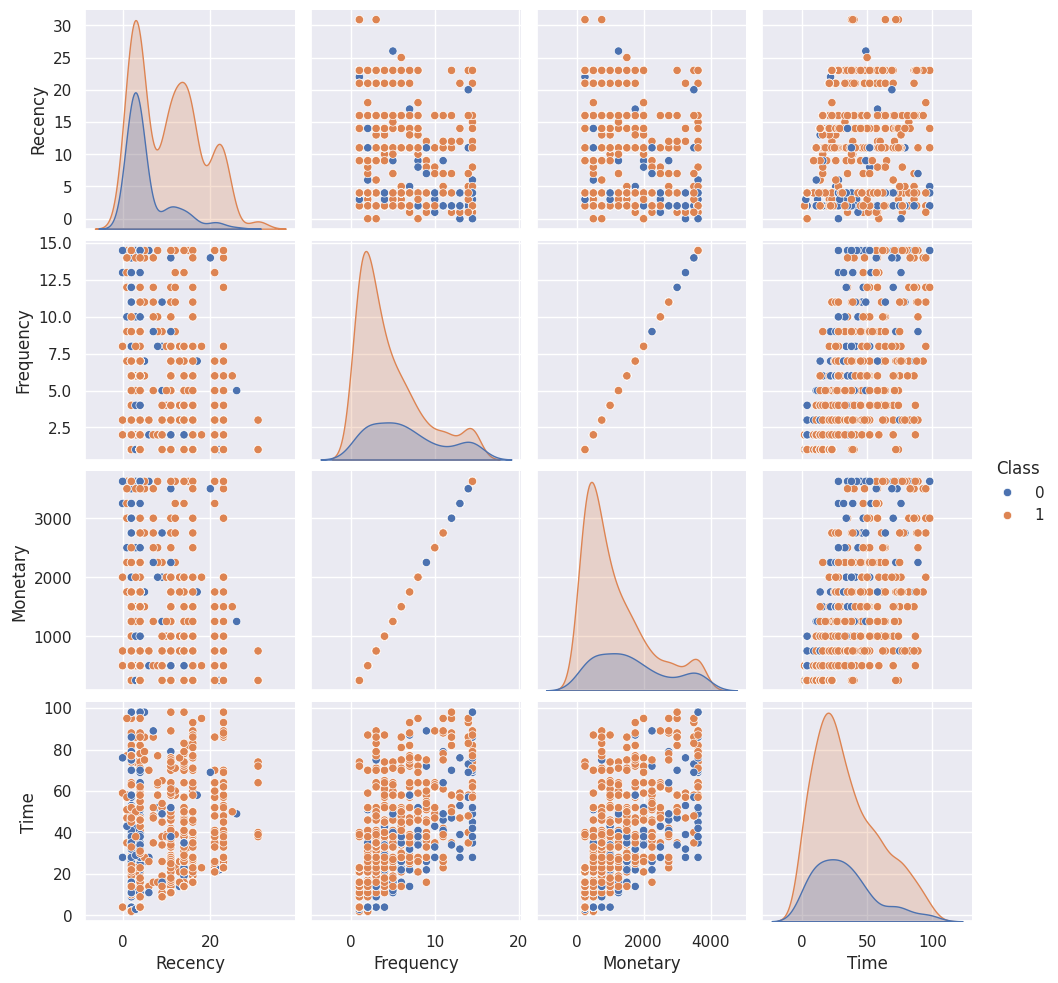

In [133]:
#visualisasi. warna dibedakan berdasarkan Classnya apakah donated atau not donated
sns.pairplot(data, vars=['Recency', 'Frequency', 'Monetary', 'Time'], hue='Class')


Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset blood_transfusion. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'Recency', 'Frequency', 'Monetaary', dan 'Time'.

sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel.
blood_transfusion: Merupakan dataset yang digunakan untuk membuat pairplot.
vars: Digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot.
hue='Class': Variabel 'Class' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'Class', yaitu apakah pasien donated atau not donated.
Dengan menggunakan pairplot dan membagi warna berdasarkan 'Class', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah pasien donated atau not donated. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan blood_transfusion pada dataset.

In [134]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'Class'
correlation_with_Class = data.corr()['Class'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Class'
print(correlation_with_Class)


Class        1.000000
Recency      0.297392
Time         0.035854
Monetary    -0.208308
Frequency   -0.208308
Name: Class, dtype: float64


output ini adalah nilai korelasi antara variabel 'Class' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.

Korelasi Positif:
- Recency (0.297), Semakin tinggi nilai Recency (semakin lama sejak terakhir donor) maka semakin besar kemungkinan orang tersebut tidak menyumbang.
- Time (0.036), Waktu total sejak pertama kali donor tidak banyak memengaruhi apakah seseorang akan menyumbang darah lagi.

Korelasi Negatif:
- Monetary (-0.208), Semakin besar total volume darah yang sudah disumbangkan, semakin besar kemungkinan orang tersebut adalah pendonor aktif. Korelasi negatif artinya mereka lebih cenderung termasuk dalam Class = 0 (donated).
- Frequency (-0.208), semakin sering seseorang menyumbangkan darah sebelumnya, semakin besar peluang mereka untuk tetap menyumbang lagi.

Korelasi Dekat dengan 0: Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'Class'. Dalam kasus ini, variabel 'Time' dan memiliki nilai korelasi yang cukup rendah dengan 'Class' (kurang dari 0.1), yang menunjukkan hubungan yang lemah dengan kemungkinan seseorang melakukan donor.

Ringkasnya, nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'Class' (donated atau not donated). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan keberadaan blood_transfusion pada dataset.

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (Class) dalam dataset.

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

Data y (Class/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

Pemisahan ini penting karena:

Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

Validasi dan Evaluasi: Data y (Class) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [135]:
#memisahkan data menjadi variabel x dan y
X=data_encoded.drop(['Class'], axis=1)
y=data_encoded['Class']


Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar)
y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)
test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.


Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.
X_test: Data testing untuk fitur-fitur.
y_train: Data training untuk target atau label.
y_test: Data testing untuk target atau label.
Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [137]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.12955466 0.59259259 0.59259259 0.375     ]
 [0.09716599 0.2962963  0.2962963  0.10416667]
 [0.06477733 0.         0.         0.        ]
 ...
 [0.22672065 0.74074074 0.74074074 0.90625   ]
 [0.09716599 0.51851852 0.51851852 0.5       ]
 [0.51821862 0.22222222 0.22222222 0.32291667]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

#NAIVE BAYES

In [138]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [139]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [140]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.754180602006689

In [141]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [142]:
# Import accurary_score
from sklearn.metrics import accuracy_score # Import accurary_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.7533


In [143]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).


Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [144]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 200}


In [145]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [146]:
y_pred = clf.predict(X_test)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.29      0.41        41
           1       0.78      0.94      0.85       109

    accuracy                           0.77       150
   macro avg       0.72      0.62      0.63       150
weighted avg       0.75      0.77      0.73       150



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (encoded_data) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision:
Kelas 0 (Donated):
Dari semua prediksi yang menyatakan bahwa seseorang menyumbangkan darah, hanya sekitar 67% yang benar-benar menyumbang. Ini menunjukkan adanya false positives—model kadang keliru mengira seseorang akan donor, padahal tidak.
Kelas 1 (Not Donated):
Dari semua prediksi bahwa seseorang tidak menyumbang, sekitar 78% di antaranya akurat. Model cukup andal dalam mengenali mereka yang tidak berdonor.

Recall:
Kelas 0 (Donated):
Dari semua orang yang benar-benar menyumbang darah, hanya 29% yang berhasil dikenali oleh model. Ini cukup rendah—model banyak melewatkan orang yang sebenarnya donor (false negatives tinggi).
Kelas 1 (Not Donated):
Model berhasil mengenali sekitar 94% dari semua orang yang tidak menyumbang. Sangat tinggi—model sangat baik dalam mendeteksi non-donor.

F1-Score:
F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.41, sedangkan untuk kelas 1 adalah 0.85. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

Accuracy:
Akurasi model adalah sekitar 77%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

Interpretasi:
Meskipun akurasi secara keseluruhan adalah 77%, melihat pada recall untuk kelas 1 (0.93) menunjukkan bahwa model memiliki performa yang lebih tinggi dalam mengidentifikasi kasus not donated (1).
Terlihat bahwa model memiliki kemampuan yang kurang baik dalam memprediksi kasus donated (0) tetapi baik dalam memprediksi kasus not donated (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model.

In [148]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.767


Output 0.767 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.767 berarti bahwa model berhasil memprediksi dengan benar sekitar 76,7% dari semua sampel pada data uji (y_test) yang telah digunakan.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

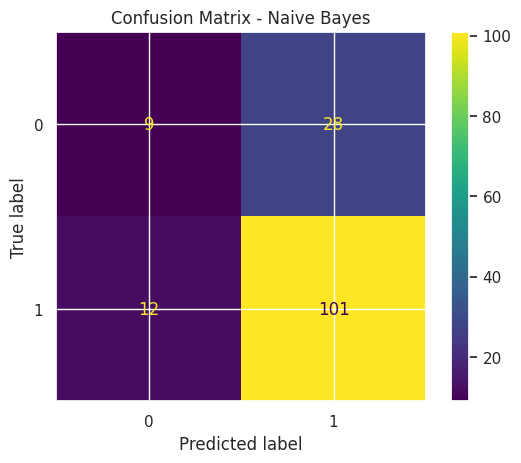

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

Interpretasi:
1. True Negative (TN) = 9
Model berhasil memprediksi 9 orang yang memang tidak menyumbang darah.
2. False Positive (FP) = 28
Model salah memprediksi 28 orang sebagai not donated (1) padahal sebenarnya donated (0). Ini berarti model cenderung sering mengira pendonor sebagai non-donor.
3. False Negative (FN) = 12
Model salah memprediksi 12 orang sebagai donated (0) padahal sebenarnya tidak berdonor (1). Ini masih lebih rendah dibanding FP, tapi tetap menunjukkan kesalahan yang signifikan.
4. True Positive (TP) = 101
Model berhasil memprediksi dengan benar bahwa 101 orang tidak menyumbang darah.

Model Naive Bayes cukup baik dalam mengenali non-donor (kelas 1), terbukti dari recall yang tinggi (94%). Namun, kurang mampu mendeteksi donor (kelas 0), karena hanya 9 dari 37 kasus donor yang dikenali dengan benar.

Tingkat false positive tinggi (28 kasus), artinya banyak donor yang dikira tidak berdonor. Ini bisa menjadi masalah jika sistem digunakan untuk menyeleksi calon donor.

Akurasi total model sekitar 73.3%, tetapi karena ada ketimpangan antara performa pada kedua kelas, penting untuk mempertimbangkan metrik selain akurasi saat mengevaluasi model ini.


#KNN

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [153]:
df = pd.read_csv('encoded_data.csv')

In [154]:
print("data shape:", df.shape)

data shape: (748, 5)


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    748 non-null    float64
 1   Frequency  748 non-null    float64
 2   Monetary   748 non-null    float64
 3   Time       748 non-null    float64
 4   Class      748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


In [156]:
df.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.346424,5.052807,1263.201872,34.282086,0.762032
std,7.317054,4.065917,1016.479182,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,30.875000,14.500000,3625.000000,98.000000,1.000000


In [157]:
df.Class.value_counts()

,count
Class,
1,570
0,178


<ipython-input-158-0868257c70ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Class', data=df, palette='flare')


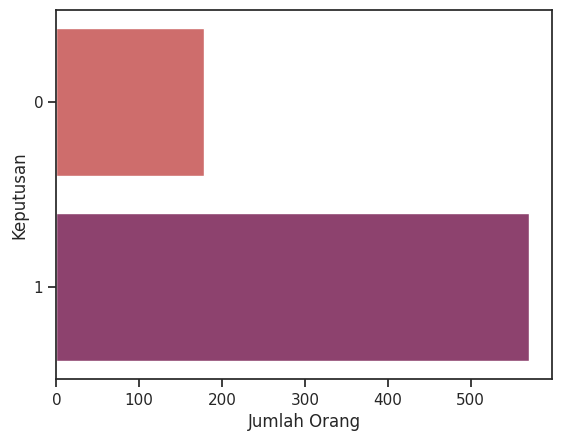

In [158]:
sns.set_theme(style='ticks')
sns.countplot(y='Class', data=df, palette='flare')
plt.ylabel("Keputusan")
plt.xlabel('Jumlah Orang')
plt.show()

In [159]:
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2.0,14.5,3625.0,98.0,0
1,0.0,13.0,3250.0,28.0,0
2,1.0,14.5,3625.0,35.0,0
3,2.0,14.5,3625.0,45.0,0
4,1.0,14.5,3625.0,77.0,1


In [160]:
x = df.drop(columns = ['Class'])
y = df['Class']

print("x : ", x.shape)
print("y : ", y.shape)

x :  (748, 4)
y :  (748,)


In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [162]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (598, 4)
y_train : (598,)
x_test : (150, 4)
y_test : (150,)


In [163]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        37
           1       0.81      0.88      0.84       113

    accuracy                           0.75       150
   macro avg       0.65      0.62      0.63       150
weighted avg       0.73      0.75      0.74       150

Akurasi KNN : 75.333333%


Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (encoded_data) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision:
Kelas 0 (Donated):
Dari seluruh prediksi yang menyatakan bahwa seseorang menyumbangkan darah, hanya 50% yang benar-benar donor. Ini menunjukkan model cukup sering membuat false positive, yakni memprediksi seseorang akan menyumbang, padahal tidak.
Kelas 1 (Not Donated):
Dari semua prediksi yang menyatakan seseorang tidak menyumbang darah, 81% di antaranya tepat. Ini menunjukkan model cukup akurat dalam mengenali non-donor, walaupun tidak sempurna.

Recall:
Kelas 0 (Donated):
Dari seluruh orang yang benar-benar menyumbang darah, hanya 35% yang berhasil dikenali oleh model. Artinya, ada banyak false negative—kasus donor yang luput terdeteksi oleh model.
Kelas 1 (Not Donated):
Sebaliknya, model berhasil mengidentifikasi 88% dari semua orang yang tidak menyumbang. Ini cukup tinggi dan menunjukkan kemampuan model yang baik dalam menangkap kelompok non-donor.

F1-Score:
Kelas 0: 0.41 (cukup rendah), menunjukkan bahwa model belum seimbang antara mendeteksi donor dengan akurasi dan ketepatan.
Kelas 1: 0.84 (tinggi), menandakan bahwa model mampu secara konsisten dan akurat mengenali non-donor.

Akurasi keseluruhan model adalah 75%, yang berarti bahwa 3 dari 4 prediksi yang dibuat oleh model benar. Ini konsisten dengan nilai Akurasi KNN: 75.333%, menunjukkan performa yang stabil dari model KNN.



In [101]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

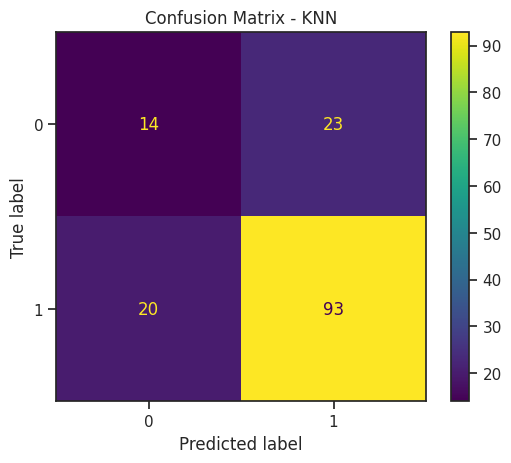

In [102]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

Interpretasi:
1. True Negative (TN) = 14
Model berhasil mengidentifikasi dengan benar 14 orang yang memang menyumbangkan darah.
2. False Positive (FP) = 23
Model salah memprediksi 23 orang sebagai not donated, padahal sebenarnya mereka donor. Ini bisa berbahaya jika sistem digunakan untuk memfilter pendonor potensial.
3. False Negative (FN) = 20
Model salah mengira 20 orang sebagai donated, padahal sebenarnya tidak berdonor.
4. True Positive (TP) = 93
Model berhasil mengenali dengan benar 93 orang yang tidak menyumbang darah.


KNN cukup andal dalam mengenali non-donor (precision dan recall tinggi pada kelas 1). Namun, masih kurang akurat untuk mengenali donor, karena dari 37 orang yang benar-benar donor, hanya 14 yang dikenali dengan benar (recall kelas 0 = 14/37 ≈ 0.378).
Model memiliki false positive yang tinggi (23 kasus), yakni banyak donor dikira bukan donor.
Akurasi total 71.33% menunjukkan performa yang lumayan, namun ada ruang besar untuk perbaikan, khususnya pada identifikasi donor (kelas 0).


# PERBANDINGAN HASIL KLASIFIKASI NAIVE BAYES DAN KNN

1. Berdasarkan confusion matrix, terlihat bahwa model Naive Bayes lebih unggul dalam mengenali kelas 1 (Not Donated), dengan jumlah prediksi benar sebanyak 101 dari 113 kasus, sementara hanya 9 dari 37 kasus pada kelas 0 (Donated) yang berhasil diprediksi dengan benar. Ini menunjukkan bahwa Naive Bayes sangat baik dalam mengidentifikasi non-donor, namun kurang akurat dalam mengenali donor. Sebaliknya, model K-Nearest Neighbors (KNN) menunjukkan hasil yang sedikit lebih seimbang, dengan 93 dari 113 kasus kelas 1 diprediksi dengan benar, dan 14 dari 37 kasus kelas 0 juga berhasil dikenali. Meskipun performa KNN terhadap kelas 0 sedikit lebih baik dibandingkan Naive Bayes, akurasi keseluruhan tetap lebih rendah. Performa masing-masing model dalam confusion matrix ini menunjukkan bahwa Naive Bayes lebih fokus dan andal dalam mengenali pola dari kelas mayoritas, sedangkan KNN lebih moderat namun kurang presisi dalam prediksinya.

2. Berdasarkan hasil evaluasi, model Naive Bayes menunjukkan akurasi sebesar 76,7%, sedikit lebih tinggi dibandingkan model K-Nearest Neighbors (KNN) yang memiliki akurasi sebesar 75,3%. Perbedaan ini mengindikasikan bahwa secara keseluruhan, Naive Bayes lebih tepat dalam memprediksi label yang benar pada data uji. Meskipun selisihnya tidak terlalu besar, akurasi yang lebih tinggi pada Naive Bayes menunjukkan bahwa model ini sedikit lebih andal dalam mengklasifikasikan data dengan benar dibandingkan KNN dalam konteks permasalahan ini.